<a href="https://colab.research.google.com/github/mmarinad/unity5.2.1_organc/blob/master/KNN_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Kolesnikova
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**IRIS dataset**

---



---



In [0]:
from sklearn import datasets

In [3]:
#load dataset
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target

#dividng on test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_labels, test_size=0.2, random_state=0)
X_test.shape
X_train.shape


(120, 4)

In [0]:
#calculate the Euclidean distance between train point and test point 
def distance(x1, x2):
    dist = 0.0
    for i in range(len(x1)):
        dist += pow((x1[i] - x2[i]), 2)
    return np.sqrt(dist)


In [0]:
#generate the list of nearest neighbors for test set
def get_neighbors(learnset, labels, testset, k, distance=distance):
  distances = []
  for index in range(len(learnset)):
    dist = distance(testset, learnset[index])
    distances.append((learnset[index], dist, labels[index]))
  distances.sort(key=lambda x: x[1])
  neighbors = distances[:k]
  return neighbors

#neigbors consist of index from training set, distance between train and test and label

In [6]:

for i in range(5):
  neighbors = get_neighbors(X_train, y_train, X_test[i], 3, distance=distance)
  print(i, X_test[i], y_test[i], neighbors)
#index 0, tested data 5.7......1.3 tested label 2


0 [5.8 2.8 5.1 2.4] 2 [(array([5.8, 2.7, 5.1, 1.9]), 0.5099019513592784, 2), (array([5.8, 2.7, 5.1, 1.9]), 0.5099019513592784, 2), (array([5.7, 2.5, 5. , 2. ]), 0.5196152422706629, 2)]
1 [6.  2.2 4.  1. ] 1 [(array([5.8, 2.6, 4. , 1.2]), 0.4898979485566356, 1), (array([5.6, 2.5, 3.9, 1.1]), 0.5196152422706634, 1), (array([5.8, 2.7, 4.1, 1. ]), 0.5477225575051662, 1)]
2 [5.5 4.2 1.4 0.2] 0 [(array([5.2, 4.1, 1.5, 0.1]), 0.3464101615137755, 0), (array([5.7, 4.4, 1.5, 0.4]), 0.3605551275463992, 0), (array([5.8, 4. , 1.2, 0.2]), 0.412310562561766, 0)]
3 [7.3 2.9 6.3 1.8] 2 [(array([7.4, 2.8, 6.1, 1.9]), 0.26457513110645936, 2), (array([7.2, 3.2, 6. , 1.8]), 0.43588989435406733, 2), (array([7.6, 3. , 6.6, 2.1]), 0.5291502622129179, 2)]
4 [5.  3.4 1.5 0.2] 0 [(array([5.1, 3.4, 1.5, 0.2]), 0.09999999999999964, 0), (array([5. , 3.3, 1.4, 0.2]), 0.14142135623730964, 0), (array([5.1, 3.5, 1.4, 0.2]), 0.17320508075688762, 0)]


In [0]:
#returns the class name and the probability for this class:
def vote_prob(neighbors):
  class_counter = Counter() #to count the quantity of the classes inside of a list
  for neighbor in neighbors:
    class_counter[neighbor[2]] += 1
  labels, votes = zip(*class_counter.most_common())
  top = class_counter.most_common(1)[0][0]
  top_vote  = class_counter.most_common(1)[0][1]
  return top, top_vote /sum(votes) #returns the most common class

In [0]:
#for visualizing of test data
X = []
for i_class in range(3): #3classes
  X.append([[], [], []])
  for i in range(len(X_test)):
    if y_test[i] == i_class:
      X[i_class][0].append(X_test[i][0])
      X[i_class][1].append(X_test[i][1])
      X[i_class][2].append(sum(X_test[i][2:]))

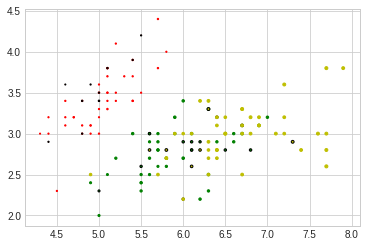

In [41]:
plt.style.use('seaborn-whitegrid')
#train data in X_learn

X_learn = []
for i_class in range(3):
    X_learn.append([[], [], []])
    for i in range(len(X_train)):
        if y_train[i] == i_class:
            X_learn[i_class][0].append(X_train[i][0])
            X_learn[i_class][1].append(X_train[i][1])
            X_learn[i_class][2].append(sum(X_train[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
#plt.figure(figsize=(10,10))
for i_class in range(3):
  plt.scatter(X_learn[i_class][0], X_learn[i_class][1], X_learn[i_class][2],c=colours[i_class])
  plt.scatter(X[i_class][0], X[i_class][1], X[i_class][2], c=colours[i_class], edgecolor='k') 

plt.show()
#train set has edges